# 实验名称：桃子分类模型的搭建与训练

## 1.实验目标

本实验主要讲解：用paddlepaddle深度学习框架搭建桃子分类模型，并完成训练和测试的全过程。

完成此实验后，可以掌握的能力有：

> - 掌握paddlepaddle深度学习框架的使用方法；
> - 掌握如何用paddlepaddle深度学习框架搭建 桃子分类模型；
> - 掌握如何完成模型的训练、评估、保存、预测等深度学习工作过程；



## 2.实验背景介绍

图像分类是计算机视觉的基础，也是其他计算机复杂任务的基础。深度学习技术发展到现在，诞生了许多优秀的图像分类算法。本次桃子分拣，我们就使用其中的典型算法代表**resnet**。



## 3. 使用paddlepaddle框架一般流程介绍



如今，paddlepaddle已经推出了2.0版本，在2.0版本中，推出了高阶API，使得代码更简洁，变成更容易。  

目前飞桨高层API由五个模块组成，分别是数据加载、模型组建、模型训练、模型可视化和高阶用法。如下图所示：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/bf01393108dd46f4899e616148429cb7aca6a224fe3f44858b59a5ec69684756" width="600" hegiht="500" ></center>
<br></br>

用paddlepaddle框架进行深度学习项目十分容易，按照一般流程即可完成深度学习项目（下图为项目实施一般流程）。该流程主要包含五大步骤分别为数据处理、模型设计、训练配置、训练过程和模型保存。在数据处理阶段主要是为模型准可用的数据，包括本地或者网络数据的收集与预处理。模型设计阶段就是深度学习项目中大家讨论最多的模型搭建，在这阶段关键就是网络结构的设计与实现，飞桨框架为开发者准备好了大量的经过工业验证的模型库和预训练模型方便开发者直接使用。在训练配置阶段开发者需要设定优化器类型和学习率衰减等参数，同时还需要指定使用GPU还是CPU完成计算。在训练过程阶段，就是框架真实运行计算过程的阶段。在该阶段，飞桨框架不断的完成正向传播、反向传播和梯度下降的过程。最后是模型保存，当模型达到预定指标或者达到预定的训练次数后，开发者可以将“训练好”的模型保存起来用以下次训练或者用以部署。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/7be7279f57eb4c4e940fda61ffc46c2417a84ec2f3d24e12b2b28a00b1215af6" width="800" hegiht="500" ></center>
<center>用paddlepaddle框架进行深度学习项目流程</center>
<br></br>

## 4. 实验内容

### 4.1 数据集介绍

本次实验我们使用的数据集是四个种类桃子，这些桃子被分在四个文件夹中，每一个文件夹的名字就对应着一类桃子。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/21d7a193d1b9455e93ed3898ea66cfbaad52fb9432c346dd93ab475511302b6c" width="800" hegiht="500" ></center>
<center>桃子数据集</center>
<br></br>

用我们自己的眼睛来观察，好像这些桃子是按照 大小、颜色 来划分的四类；究竟是不是这样呢？等做完了这个实验，深度学习模型自己就能判断出来是按照什么来划分了。

本次实验，已经为大家提供好了数据集，数据集存储在 <font face="黑体" color=red size=3>“data/enhancement/”</font> 文件夹下。图片分为2个文件夹，一个是训练集一个是测试集。每个文件夹中有4个分类：R0,B1,M2,S3。
桃子分拣原数据集，包含两个文件夹：“train”、“test”  
每个文件夹下有：“B1”、“M2”、“R0”、“S3”  
训练集：  
    train_B1:1601张图片  
    train_M2:1800张图片  
    train_R0:1601张图片  
    train_S3:1635张图片  
测试集：  
    test_B1:16张图片  
    test_M2:18张图片  
    test_R0:18张图片  
    test_S3:15张图片  

In [ ]:
# 数据解压。如果已经解压过一次了，就将该段代码注释掉
# !unzip /home/aistudio/data/data103593/data.zip -d /home/aistudio/data/enhancement_data/

#### 实验文件介绍

本次实验文件结构如下：

本次实验的代码、数据集 都已经为大家准备好，目录结构如下图所示：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/46b61b07e6124de3ab736dee5714554be25ddc4eb8e642489a239115c86197b5" width="800" hegiht="500" ></center>
<center>本次实验文件结构</center>
<br></br>


### 4.2  导入实验需要的库

实验第一步，需要导入相关的库，最主要的是如下几个：

> - os ： OS模块提供了非常丰富的方法用来处理文件和目录。
> - sys：sys模块提供了一系列有关Python运行环境的变量和函数。
> - shutil:用于文件拷贝的模块 
> - numpy：numpy 是 Python 语言的一个扩展程序库，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。
> - random：Python中的random模块用于生成随机数。
> - paddle.vision.datasets：该模块包含数据加载的相关函数，比如可以用来加载常用的数据集等，如mnist。
> - paddle.vision.transforms:该模块包含对图像进行转换的函数，比如把HWC格式的图片，转变成CHW模式的输入张量。也包含飞桨框架对于图像预处理的方式，可以快速完成常见的图像预处理，如调整色调、对比度，图像大小等；
> - paddle.io.Dataset:该模块包含了飞桨框架数据加载方式，可以“一键”完成数据的批加载与异步加载。

In [ ]:
#os ： OS模块提供了非常丰富的方法用来处理文件和目录。
#sys：sys模块提供了一系列有关Python运行环境的变量和函数。
#shutil:用于文件拷贝的模块 
#numpy：numpy 是 Python 语言的一个扩展程序库，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。
#random：Python中的random模块用于生成随机数。
#paddle.vision.datasets：该模块包含数据加载的相关函数，比如可以用来加载常用的数据集等，如mnist。
#paddle.vision.transforms:该模块包含对图像进行转换的函数，比如把HWC格式的图片，转变成CHW模式的输入张量。也包含飞桨框架对于图像预处理的方式，可以快速完成常见的图像预处理，如调整色调、对比度，图像大小等；
#paddle.io.Dataset:高模块包含了飞桨框架数据加载方式，可以“一键”完成数据的批加载与异步加载。
import os
import sys
import shutil
import numpy as np
import paddle
import random
from paddle.io import Dataset, DataLoader
from paddle.vision.datasets import DatasetFolder, ImageFolder
from paddle.vision import transforms as T


### 4.3 数据集准备

本次实验，已经为大家提供好了数据集，数据集存储在 <font face="黑体" color=red size=3>“data/enhancement/”</font> 文件夹下。

本次实验的数据预处理包括：

> 1.生成txt文件  
> 2.拆分训练集、验证集

#### 4.3.1 生成txt文件

为什么要生成txt文件呢？我们看到，在数据集中，每一个文件夹对应一个类别；但是并没有一个txt 文件来指定标签（label）；于是我们首先要生成txt文件；

为了代码的整齐和简洁，我们把数据集路径等参数配置在一个全局变量**train_parameters**中。其解释如下：

> - 'train_data_dir'是提供的经增强后的原始训练集；
> - 'test_image_dir'是提供的原始测试集；
> - 'train_image_dir'和'eval_image_dir'是由原始训练集经拆分后生成的实际训练集和验证集
> - 'train_list_dir'和'test_list_dir'是生成的txt文件路径
> - 'saved_model' 存放训练结果的文件夹

In [ ]:
'''
参数配置：
'train_data_dir'是提供的经增强后的原始训练集；
'test_image_dir'是提供的原始测试集；
'train_image_dir'和'eval_image_dir'是由原始训练集经拆分后生成的实际训练集和验证集
'train_list_dir'和'test_list_dir'是生成的txt文件路径
'saved_model' 存放训练结果的文件夹
'''
train_parameters = {          
    'train_image_dir': './data/splitted_training_data/train_images',
    'eval_image_dir': './data/splitted_training_data/eval_images',
    'test_image_dir': './data/enhancement_data/test',
    'train_data_dir':'./data/enhancement_data/train',
    'train_list_dir':'./data/enhancement_data/train.txt',
    'test_list_dir':'./data/enhancement_data/test.txt',  
    'saved_model':'./saved_model/'
}

#数据集的4个类别标签
labels = ['R0', 'B1', 'M2', 'S3']
labels.sort()

In [ ]:

#准备生成训练集文件名、标签名的txt文件
write_file_name = train_parameters[ 'train_list_dir']

#以写方式打开write_file_name文件
with open(write_file_name, "w") as write_file:
    #针对不同的分类标签分别录入
    for label in labels:
        #建立空列表，用于保存图片名
        file_list = [] 
        #用于找到该标签路径下的所有图片.
        train_txt_dir = train_parameters[ 'train_data_dir']+'/'+label+'/'     

        for file_name in os.listdir(train_txt_dir):
            dir_name = label        
            temp_line = dir_name + '/' + file_name + '\t' + label + '\n'    # 例如："B1/101.png	B1"
            write_file.write(temp_line)
    


In [ ]:

#准备生成测试集文件名、标签名的txt文件
write_file_name = train_parameters[ 'test_list_dir']

#以写方式打开write_file_name文件
with open(write_file_name, "w") as write_file:
    #针对不同的分类标签分别录入
    for label in labels:
        #建立空列表，用于保存图片名
        file_list = [] 
        #用于找到该标签路径下的所有图片.
        train_txt_dir = train_parameters[ 'test_image_dir']+'/'+label+'/'     

        for file_name in os.listdir(train_txt_dir):
            dir_name = label        
            temp_line = dir_name + '/' + file_name + '\t' + label + '\n'    # 例如："B1/101.png	B1"
            write_file.write(temp_line)

以上步骤操作完之后，就会在 data/enhancement_data/目录下生成 train.txt   test.txt两个文件。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/073480ede04b406cba32b9e621db79e0fcc869adea22405bad63d38b8cc91426" width="500" hegiht="500" ></center>
<br></br>

#### 4.3.2  划分训练集和验证集

> - 我们已经有了训练集、测试集；最好还要把训练集再次拆分，从训练集中拆分出来一个验证集。  
> - 这样，我们训练的时候，就可以用验证集来验证我们的模型训练效果，通过实时的观察训练效果，便于我们及时的调参。

In [ ]:
#判断splitted_training_data文件夹是否存在，如果不存在就新建一个
if not os.path.exists('data/splitted_training_data'):
    os.makedirs('data/splitted_training_data')


In [ ]:

#定义一个函数，来拆分训练集、验证集
def create_train_eval():
    '''
    划分训练集和验证集
    '''
    train_dir = train_parameters['train_image_dir']
    eval_dir = train_parameters['eval_image_dir']
    train_list_path = train_parameters['train_list_dir']  
    train_data_dir = train_parameters[ 'train_data_dir'] 
    
    print('creating training and eval images')
    #如果文件夹不存在，建立相应的文件夹
    if not os.path.exists(train_dir):
        os.mkdir(train_dir)
    if not os.path.exists(eval_dir):
        os.mkdir(eval_dir) 

    #打开txt文件，分割数据
    file_name = train_list_path
    f = open(file_name, 'r') 
    #按行读取数据
    lines = f.readlines()
    f.close()
        
    for i in range(len(lines)):
        #将每行数据按照空格分割成2部分，并取第一部分的路径名和图像文件名，例如:R0/1.png
        img_path = lines[i].split('\t')[0] 
        #取第二部分的标签，例如:R0
        class_label = lines[i].split('\t')[1].strip('\n')
        # 每8张图片取一个做验证数据,其他用于训练
        if i % 8 == 0:
            #把目录和文件名合成一个路径
            eval_target_dir = os.path.join(eval_dir, class_label) 
            #将总的文件路径与当前图像的文件名合到一起，实际就是得到训练集图像所在的文件夹下的图像名   
            eval_img_path = os.path.join(train_data_dir, img_path)
            if not os.path.exists(eval_target_dir):
                    os.mkdir(eval_target_dir)  
            #将图片复制到验证集指定标签的文件夹下      
            shutil.copy(eval_img_path, eval_target_dir) 
        else:           
            train_target_dir = os.path.join(train_dir, class_label)                                 
            train_img_path = os.path.join(train_data_dir, img_path)
            if not os.path.exists(train_target_dir):
                os.mkdir(train_target_dir)
            shutil.copy(train_img_path, train_target_dir) 
    print ('划分训练集和验证集完成！')


# 制作数据集，如果已经做好了，就请将代码注释掉
create_train_eval()

creating training and eval images
划分训练集和验证集完成！


运行完上面的代码，就完成了训练集、验证集的拆分。拆分放在 ./data/splitted_training_data/  目录下：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f1d018b859ed4dfb947625e10c4e04e129459cfaa8744ec993ec0b8b59cdcc94" width="500" hegiht="500" ></center>
<br></br>

### 4.5  自定义数据集类

飞桨框架将一些我们常用的数据集做成了API，对用户开放，对应API为paddle.vision.datasets与paddle.text.datasets。我们使用的时候可以直接调用这些API就可以完成数据集的下载和使用。这些集成好的数据集有：

> - <font face="黑体" color=red size=3>视觉相关数据集： ['DatasetFolder', 'ImageFolder', 'MNIST', 'FashionMNIST', 'Flowers', 'Cifar10', 'Cifar100', 'VOC2012']</font> 
> - <font face="黑体" color=red size=3>自然语言相关数据集： ['Conll05st', 'Imdb', 'Imikolov', 'Movielens', 'UCIHousing', 'WMT14', 'WMT16']
</font>

但是，在实际的使用场景中，我们往往需要用到自己的数据集。比如本次实验，我们就使用自己的桃子数据集。

飞桨为用户提供了paddle.io.Dataset基类，让用户通过类的集成来快速实现数据集定义。

PaddlePaddle对数据集的加载方式是：统一使用Dataset（数据集定义） + DataLoader（多进程数据集加载）。


#### 数据集定义-Dataset
> - 首先我们先进行数据集的定义 ；  
> - 数据集定义主要是实现一个新的Dataset类，继承父类paddle.io.Dataset；  
> - 然后实现父类中以下两个抽象方法，“__ getitem __ ”和 “__ len __”：  

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/1ffc401ddd7a49e69aaf5dc92314e9f3f4ec0054b63744e29e23b3b3de2b8a2c" width="700" hegiht="500" ></center>
<br></br>


In [ ]:
class PeachDataset(Dataset):
    """
    步骤一：继承paddle.io.Dataset类
    """
    def __init__(self, mode='train'):
        """
        步骤二：实现构造函数，定义数据读取方式，划分训练、验证和测试数据集
        """
        super(PeachDataset, self).__init__()
        train_image_dir = train_parameters['train_image_dir']#训练集的路径
        eval_image_dir = train_parameters['eval_image_dir']
        test_image_dir = train_parameters['test_image_dir']        
        
        '''         ''' 
        #transform数据增强函数，这里仅对图片的打开方式进行了转换            
        #这里用Transpose()将图片的打开方式(宽, 高, 通道数)更改为PaddlePaddle读取的方式是(通道数, 宽, 高)
        mean = [127.5, 127.5, 127.5] # 归一化，均值
        std = [127.5, 127.5, 127.5] # 归一化，标注差 
        transform_train = T.Compose([T.ColorJitter(0.4, 0.4, 0.4, 0.4)
                                     ,T.Resize(size=(224,224)) 
                                     ,T.Transpose()
                                     ,T.Normalize(mean, std)
                                    ])
        transform_eval = T.Compose([T.Resize(size=(224,224)) 
                                    ,T.Transpose()
                                    ,T.Normalize(mean, std)
                                    ])
        transform_test = T.Compose([T.Resize(size=(224,224)) 
                                    ,T.Transpose()
                                    ,T.Normalize(mean, std)
                                    ])
        
        '''         
        # 参考API：https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/vision/Overview_cn.html#about-transforms
        #这里用Transpose()将图片的打开方式(宽, 高, 通道数)更改为PaddlePaddle读取的方式是(通道数, 宽, 高)
        # ColorJitter 随机调整图像的亮度，对比度，饱和度和色调。
        # hflip 对输入图像进行水平翻转。        
        # Normalize 归一化。mean = [127.5, 127.5, 127.5]，std = [127.5, 127.5, 127.5]
        # RandomHorizontalFlip 基于概率来执行图片的水平翻转。
        # RandomVerticalFlip 基于概率来执行图片的垂直翻转。
        mean = [127.5, 127.5, 127.5] # 归一化，均值
        std = [127.5, 127.5, 127.5] # 归一化，标注差 
        transform_train = T.Compose([T.Resize(size=(224,224)), 
                                     T.Transpose(),                                
                                     T.ColorJitter(0.4, 0.4, 0.4, 0.4),
                                     T.RandomHorizontalFlip(prob=0.5,),
                                     T.RandomVerticalFlip(prob=0.5,),
                                     T.Normalize(mean, std)])
        transform_eval = T.Compose([T.Resize(size=(224,224)), T.Transpose()])
        transform_test = T.Compose([T.Resize(size=(224,224)), T.Transpose()])
        ''' 

        #飞桨推荐使用 paddle.io.DataLoader 完成数据的加载，生成一个可以加载数据的迭代器
        # 参考API:https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/io/DataLoader_cn.html#cn-api-fluid-io-dataloader
        #加载训练集，train_data_folder 是一个迭代器
        # 参考API：https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/vision/datasets/DatasetFolder_cn.html#datasetfolder
        train_data_folder = DatasetFolder(train_image_dir, transform=transform_train)
        #加载验证集，eval_data_folder 是一个迭代器
        eval_data_folder = DatasetFolder(eval_image_dir, transform=transform_eval)
        #加载测试集，test_data_folder 是一个迭代器
        test_data_folder = DatasetFolder(test_image_dir, transform=transform_test)
        self.mode = mode
        if self.mode  == 'train':
            self.data = train_data_folder
        elif self.mode  == 'eval':
            self.data = eval_data_folder
        elif self.mode  == 'test':
            self.data = test_data_folder

    # 每次迭代时返回数据和对应的标签
    def __getitem__(self, index):
        """
        步骤三：实现__getitem__方法，定义指定index时如何获取数据，并返回单条数据（训练数据，对应的标签）
        """
        data = np.array(self.data[index][0]).astype('float32')

        label = np.array([self.data[index][1]]).astype('int64')

        return data, label

    # 返回整个数据集的总数
    def __len__(self):
        """
        步骤四：实现__len__方法，返回数据集总数目
        """
        return len(self.data)



In [ ]:
#用自定义的PeachDataset类，加载自己的数据集
train_dataset = PeachDataset(mode='train')
val_dataset = PeachDataset(mode='eval')
test_dataset = PeachDataset(mode='test')

#### 数据集加载-DataLoader
DataLoader 返回一个迭代器，迭代器返回的数据中的每个元素都是一个Tensor，其调用方法如下：

```python
class paddle.io.DataLoader(dataset, feed_list=None, places=None, return_list=False, batch_sampler=None, batch_size=1, shuffle=False, drop_last=False, collate_fn=None, num_workers=0, use_buffer_reader=True, use_shared_memory=True, timeout=0, worker_init_fn=None)
```
DataLoader 迭代一次给定的 dataset（顺序由 batch_sampler 给定）  
DataLoader支持**单进程**和**多进程**的数据加载方式，当 num_workers 大于0时，将使用多进程方式异步加载数据。

> 详细介绍 https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/io/DataLoader_cn.html


下面的代码用来展示如何使用 DataLoader

In [ ]:
# DataLoader 示例代码

# 加载库
import cv2 as cv #使用 OpenCV
print("opencv 版本号为：" + cv.__version__) #查看版本号
# 事实上在使用 OpenCV之前应该安装该类库，但是由于使用了 AI-Studio，所以系统已经替开发者预先安装好了： opencv-python 4.1.1.26       
from matplotlib import pyplot as plt #在该页面画图
%matplotlib inline 

# 构造一个 DataLoader
test_loader = DataLoader(test_dataset,
                    batch_size=2,
                    shuffle=True,
                    drop_last=True,
                    num_workers=2)


opencv 版本号为：4.1.1


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


In [ ]:
# 使用 DataLoader 来遍历数据集
for mini_batch in test_loader(): # 从 DataLoader 中获取 mini_batch 
    print("mini_batch 的类型为：" + str(type(mini_batch)))
    pic_list = mini_batch[0] #图片数据
    label_list = mini_batch[1] #标记
    print("mini_batch 的大小为：" + str(len(pic_list)))

    # 将图片显示转化为 numpy 格式，并且将内部的数字设置为 整数类型
    pic_1 = pic_list[0]
    pic_2 = pic_list[1]
    arr1 = np.asarray(pic_1, dtype=np.float64) 
    print(arr1.shape)
    arr2 = np.asarray(pic_2, dtype=np.float64)    
    print(arr2.shape)

    break #由于是示例，所以仅拿出第一个 mini_batch
    
# 

mini_batch 的类型为：<class 'list'>
mini_batch 的大小为：2
(3, 224, 224)
(3, 224, 224)


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


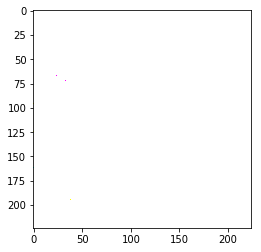

In [ ]:
# 把获取到的图片数据展示出来
r = arr1[0]
g = arr1[1]
b = arr1[2]
img = cv.merge([r,g,b])

plt.imshow(img)


如上图所示，这时候取得的图片并不是原始图片的样子。那是因为在 PeachDataset 类中，对图片数据使用了 transform 方法，也就是对图片做了一些变化。为了说明这一点，可以使用下面的方法作对比。

下图为已经发生变化图片：

![](https://ai-studio-static-online.cdn.bcebos.com/68679a450e8c4df98fac8ccd09eb27029f771450fe0546f7834e73170c4c135b)


为了对比说明请修改 PeachDataset 类中的代码，加入一个注释符号，代码如下：  
这样做的目的是，既可以改变图片的大小而且符合paddle的要求，又可以避免产生归一化引起的数据变动。  
```python
transform_test = T.Compose([
                    T.Resize(size=(224,224)) 
                   ,T.Transpose()
                   #,T.Normalize(mean, std)
                   ])
```       

修改完该代码后，请打开下面的代码的注释，重启执行器，点击右上角的 “运行->运行当前选中及之前的所有cell”
  
就可以看到原始数据集中的图片，如下图所示：

![](https://ai-studio-static-online.cdn.bcebos.com/e2b2b7868b124b6c9478cebd1f0c53024457229eef1b4c75a0c1676dd2489c41)

查看完数据后，请不要忘记，打开 PeachDataset 类中的注释。和加入下方代码的注释。

In [ ]:
'''
# 把获取到的图片数据展示出来
arr1 = arr1 / 255 # 把每一个像素都变到 0-1 之间
r = arr1[0]
g = arr1[1]
b = arr1[2]
img = cv.merge([r,g,b])

plt.imshow(img)
'''

### 4.6  搭建分类模型

接下来，我们就要搭建一个图像分类模型，用这个模型可以实现桃子数据集的分类。

怎么搭建分类模型呢？
> - 我们可以按照自己的想法搭建DNN网络模型，或者CNN网络模型，或者其他网络模型，但是这对我们的算法研究能力要求很高；
> - 我们可以使用已经成熟的、经典的网络模型，比如VGG、ResNet等；用paddle框架来搭建这些模型，来为我们所用。

本次实验，我们就采用50层的残差网络ResNet作为我们的分类模型。

并且，本次实验，为了增加我们的模型效果，我们还是使用了迁移学习方法。那么为什么要用迁移学习呢？怎么使用迁移学习呢？

### 4.6.1 迁移学习

现实的工程开发中，很少有人从零开始训练一个完整的神经网络。

<font face="黑体" color=red size=3>为什么？</font>

因为一般我们的数据集都不是很大，所以训练出的模型泛化能力往往不强。且训练非常耗时。

<font face="黑体" color=red size=3>怎么做？</font>

常用的方法是找到一个很大的公有数据集（比如ImageNet，包含了120万张图片和1000个类别），在这个数据集上先训练好一个神经网络模型A（这个A一般别人已经训练好了），然后将这个A作为一个起始点，经过微调，再训练我们自己的数据集。这个A也叫做 **“预训练模型”**。

这就是 **迁移学习** 的一种方法，也叫做 **fine tune**。

那么fine tune的理论依据是什么？也即是：为什么我们可以在别人训练好的模型的基础上进行微调？这就要从卷积神经网络的结构原理上进行分析。

> - 对于卷积网络来说：前面几层都学习到的是通用的特征（generalfeature），比如图像的边缘；随着网络层次的加深，后面的网络更偏重于学习特定的特征（specific feature），例如身体部位、面部和其他组合性特征。
> - 最后的全连接层通常被认为是捕获了与解决相应任务相关的信息，例如 AlexNet 的全连接层可以指出提取的这些特征属于1000 类物体中的哪一类。
> - 比如在人脸识别过程中，初级的若干层卷积会提取到直线、曲线等通用特征；中间若干层卷积会进一步学习到眼睛、鼻子等特定部位，高层卷积则可以学习到组合特征，从而判断出这是一张人脸图像。
> -卷积神经网络的这种特性，就是我们的fine tune理论依据。

可能有同学会问：那为什么我们不直接用别人在大数据集（比如ImageNet）上训练好的模型，而是还要微调呢？

> - 因为别人训练好的模型，可能并不是完全适用于我们自己的任务。可能别人的网络能做比我们的任务更多的事情；可能别人的网络比较复杂，我们的任务比较简单。
> -举一个例子，假如我们想训练一个猫狗图像二分类的网络，我们首先会想到直接使用别人在 ImageNet上训练好的网络模型。但是 ImageNet 有 1000 个类别，而我们只需要2 个类别。此时，就需要针对我们自己的任务，来进行微调了，比如可以固定原始网络的相关层，修改网络的输出层，以使结果更符合我们的需要。


在PaddlePaddle2.0中，使用预训练模型只需要设定模型参数pretained=True。



### 4.6.2 搭建模型

使用飞桨，很便利的一点是：飞桨框架内置了许多模型，真正的一行代码实现深度学习模型。

目前，飞桨框架内置的模型都是CV领域的模型，在paddle.vision.models目录下，具体包含如下的模型：


<font face="黑体" color=red size=3>飞桨框架内置模型： ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'VGG', 'vgg11', 'vgg13', 'vgg16', 'vgg19', 'MobileNetV1', 'mobilenet_v1', 'MobileNetV2', 'mobilenet_v2', 'LeNet']
</font>

比如我们本次使用的resnet50，就已经有内置模型了。  

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/811e72cbe4c14ec8b83f41ce222bace5f7c5a8d69a084d668a8cd716c6f1360c" width="700" hegiht="500" ></center>
<br></br>

In [ ]:
# 使用内置的模型,这边可以选择多种不同网络，这里选了resnet50网络
#pretrained (bool，可选) - 是否加载在imagenet数据集上的预训练权重
model = paddle.vision.models.resnet18(pretrained=True, num_classes=4)    

#尝试不同的网络结构：MobileNetV2
# MobileNetV2参考文档：https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/vision/models/MobileNetV2_cn.html
# model = paddle.vision.models.mobilenet_v2(pretrained=True, num_classes=4)    

#使用paddle.Model完成模型的封装，将网络结构组合成一个可快速使用高层API进行训练和预测的类。
model = paddle.Model(model)



100%|██████████| 69183/69183 [00:01<00:00, 47292.60it/s]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/layers.py:1301: UserWarning: Skip loading for fc.weight. fc.weight receives a shape [512, 1000], but the expected shape is [512, 4].
  warnings.warn(("Skip loading for {}. ".format(key) + str(err)))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/layers.py:1301: UserWarning: Skip loading for fc.bias. fc.bias receives a shape [1000], but the expected shape is [4].
  warnings.warn(("Skip loading for {}. ".format(key) + str(err)))


使用 model.summary 观察网络情况
> 参考文档： https://github.com/PaddlePaddle/Paddle/blob/release/2.1/python/paddle/hapi/model.py#L883

API 文档写的和真实代码之间稍有不同

```python
# 以下为源代码
def summary(self, input_size=None, dtype=None):
        """Prints a string summary of the network.
        Args:
            input_size (tuple|InputSpec|list[tuple|InputSpec], optional): size of input tensor. 
                    if not set, input_size will get from ``self._inputs`` if network only have 
                    one input, input_size can be tuple or InputSpec. if model have multiple 
                    input, input_size must be a list which contain every input's shape. 
                    Default: None.
            dtypes (str, optional): if dtypes is None, 'float32' will be used, Default: None.
        Returns:
            Dict: a summary of the network including total params and total trainable params.
        Examples:
            .. code-block:: python
              import paddle
              from paddle.static import InputSpec
           
              input = InputSpec([None, 1, 28, 28], 'float32', 'image')
              label = InputSpec([None, 1], 'int64', 'label')
           
              model = paddle.Model(paddle.vision.models.LeNet(),
                  input, label)
              optim = paddle.optimizer.Adam(
                  learning_rate=0.001, parameters=model.parameters())
              model.prepare(
                  optim,
                  paddle.nn.CrossEntropyLoss())
              params_info = model.summary()
              print(params_info)
        """
        assert (input_size is not None or self._inputs is not None
                ), "'input_size' or 'self._input' must be set"
        if input_size is not None:
            _input_size = input_size
        else:
            _input_size = self._inputs
        return summary(self.network, _input_size, dtype)
```
参数：
- input_size (tuple|InputSpec|list) - 输入张量的大小。如果网络只有一个输入，那么该值需要设定为tuple或InputSpec。如果模型有多个输入。那么该值需要设定为list[tuple|InputSpec]，包含每个输入的shape。如果该值没有设置，会将 self._inputs 作为输入。默认值：None。
- dtypes (str，可选) - 输入张量的数据类型，如果没有给定，默认使用 float32 类型。默认值：None。

返回：字典。包含网络全部参数的大小和全部可训练参数的大小。



In [ ]:
# 使用 summary 观察网络信息
model.summary(input_size=(1, 3, 224, 224), dtype='float32') 

-------------------------------------------------------------------------------
   Layer (type)         Input Shape          Output Shape         Param #    
     Conv2D-1        [[1, 3, 224, 224]]   [1, 64, 112, 112]        9,408     
   BatchNorm2D-1    [[1, 64, 112, 112]]   [1, 64, 112, 112]         256      
      ReLU-1        [[1, 64, 112, 112]]   [1, 64, 112, 112]          0       
    MaxPool2D-1     [[1, 64, 112, 112]]    [1, 64, 56, 56]           0       
     Conv2D-2        [[1, 64, 56, 56]]     [1, 64, 56, 56]        36,864     
   BatchNorm2D-2     [[1, 64, 56, 56]]     [1, 64, 56, 56]          256      
      ReLU-2         [[1, 64, 56, 56]]     [1, 64, 56, 56]           0       
     Conv2D-3        [[1, 64, 56, 56]]     [1, 64, 56, 56]        36,864     
   BatchNorm2D-3     [[1, 64, 56, 56]]     [1, 64, 56, 56]          256      
   BasicBlock-1      [[1, 64, 56, 56]]     [1, 64, 56, 56]           0       
     Conv2D-4        [[1, 64, 56, 56]]     [1, 64, 56, 56]    

{'total_params': 11188164, 'trainable_params': 11168964}

In [ ]:

# 调用Paddle的VisualDL模块，保存信息到目录中。
#log_dir (str) - 输出日志保存的路径。
callback = paddle.callbacks.VisualDL(log_dir='visualdl_log_dir')

### 4.6.3  训练配置

#### 优化器配置
用paddle.Model完成模型的封装后，在训练前，需要对模型进行配置，通过Model.prepare接口来对训练进行提前的配置准备工作，包括设置模型优化器，Loss计算方法，精度计算方法等。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/ba86d2cf71b44e2a9ef1f81d58e283d4303c0827fcbe4b558764e12976ec2d91" width="700" hegiht="500" ></center>
<br></br>


> - 学习率(learning_rate)参数很重要。
> - 如果训练过程中的准确率呈震荡状态，忽大忽小，可以试试把学习率调低

In [ ]:
#通过Model.prepare接口来对训练进行提前的配置准备工作，包括设置模型优化器，Loss计算方法，精度计算方法等
# 优化器API文档： https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/optimizer/Overview_cn.html#paddle-optimizer

# 学习率衰减策略
# 学习率衰减策略 API 文档：https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/optimizer/Overview_cn.html#about-lr
scheduler_StepDecay = paddle.optimizer.lr.StepDecay(learning_rate=0.1, step_size=50, gamma=0.9, verbose=False)
scheduler_PiecewiseDecay = paddle.optimizer.lr.PiecewiseDecay(boundaries=[100, 1000, 4000, 5000, 6000], values=[0.1, 0.5, 0.01, 0.005], verbose=False)

# 尝试使用 SGD、Momentum 方法
sgd = paddle.optimizer.SGD(
                learning_rate=scheduler_StepDecay, 
                parameters=model.parameters())


adam = paddle.optimizer.Adam( 
                learning_rate=0.01, #调参
                parameters=model.parameters())

model.prepare(optimizer= adam, # adam
              loss=paddle.nn.CrossEntropyLoss(),
              metrics=paddle.metric.Accuracy())

#### 计算资源配置
设置该次计算使用的具体计算资源。  
首先，可以查看当前使用的计算设备。（此步骤不是必须的）  
然后，设置本次训练使用的计算设备。


In [ ]:

# 查看当前计算设备
device = paddle.device.get_device()
print(device)
# 使用GPU训练
device = paddle.set_device('gpu') # or 'cpu'
print(device)

### 4.6.4  训练模型

做好模型训练的前期准备工作后，我们正式调用fit()接口来启动训练过程，需要指定以下至少3个关键参数：训练数据集，训练轮次和单次训练数据批次大小。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/286c9ba0cdc94c05ac68c2110a423026cca2028ed75645be882d3187024f8863" width="700" hegiht="500" ></center>
<br></br>


### 训练时间说明：

> - 在CPU上运行10个epoch，需要1.5小时左右；
> - 在GPU上运行10个epoch，需要30分钟左右；

In [ ]:
# fit API文档： https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html#fit-train-data-none-eval-data-none-batch-size-1-epochs-1-eval-freq-1-log-freq-10-save-dir-none-save-freq-1-verbose-2-drop-last-false-shuffle-true-num-workers-0-callbacks-none

# 启动模型训练，指定训练数据集，设置训练轮次，设置每次数据集计算的批次大小，设置日志格式
#epochs：总共训练的轮数
#batch_size：一个批次的样本数量
#如果提示内存不足，可以尝试将batch_size调低
#verbose：日志显示，0为不在标准输出流输出日志信息,1为输出进度条记录，2为每个epoch输出一行记录;1为输出进度条记录，2为每个epoch输出一行记录

model.fit(train_dataset,
          val_dataset,
          epochs=1,
          batch_size=2,
          callbacks=callback,
          verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/1


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(seq, collections.Sequence) and
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/nn/layer/norm.py:641: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


step 2904/2904 [==============================] - loss: 0.0549 - acc: 0.5786 - 62ms/step         
Eval begin...
step 415/415 [==============================] - loss: 0.0867 - acc: 0.7819 - 23ms/step        
Eval samples: 830


### 4.6.5 模型评估和保存

模型训练结束后，我们得到了一个训练好的模型，但是这个模型效果怎么样，还需要我们去具体做下评估。

什么是模型评估呢？

> - 模型评估其实就是：使用我们预留的测试数据放到所得到的模型中进行实际的预测，并基于标签进行校验，来看模型在测试集上的表现。

> - 模型评估的代码实现，在高层API中也非常地简单，我们事先定义好用于评估使用的数据集后，对于训练好的模型进行评估操作可以使用model.evaluate接口；操作结束后会根据prepare接口配置的loss和metric来进行相关指标计算返回。



### 本实验评价指标：

本次实验，我们采用的评价指标是 <font face="黑体" color=red size=3>准确率（accuracy），简称acc</font>  

同学们相互之间比较一下，你的模型评估结果怎么样？你的acc值达到多少了？

该实验如果进行了合理的 数据增强，准确率（ accuracy）是可以达到很高的，请大家努力把acc值提升到90%以上。


In [ ]:
#模型评估
#对于训练好的模型进行评估操作可以使用 model.evaluate 接口；操作结束后会根据 prepare 接口配置的 loss 和 metric 来进行相关指标计算返回。
# 评价指标参考文档：https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html#evaluate-eval-data-batch-size-1-log-freq-10-verbose-2-num-workers-0-callbacks-none
model.evaluate(test_dataset, verbose=1)



Eval begin...
step 67/67 [==============================] - loss: 0.0052 - acc: 0.7910 - 13ms/step        
Eval samples: 67


{'loss': [0.0051732725], 'acc': 0.7910447761194029}

In [ ]:
#模型保存
model.save('./saved_model/saved_model')  # save for training

### 4.6.6 模型预测

以上步骤，我们完成了模型的训练、模型的评估、模型保存；如果这个模型经过评估之后效果不错，那么就可以使用了。我们就可以使用这个保存的模型来进行预测。

如何进行模型预测呢？

> - 飞桨高层API中提供了model.predict接口来方便用户对训练好的模型进行预测；
> - 我们只需要将“预测数据+保存的模型”，放到model.predict接口进行计算即可，接口会把模型计算得到的预测结果返回，从而完成我们的任务。

In [ ]:
#预测模型
results = model.predict(test_dataset)


Predict begin...
step 67/67 [==============================] - 12ms/step         
Predict samples: 67


In [ ]:
# 观察 result
print(type(results)) #list
print(len(results)) #len == 1

# 一行一行打印结果
for i in results[0]:
    print(i)

<class 'list'>
1
[[ 0.4494054   1.8589294  -2.709025   -0.98785317]]
[[ 0.80108535  2.0312922  -2.3985271  -1.667168  ]]
[[-0.487098    2.5169828  -3.8384209   0.09941977]]
[[ 1.1755923  1.9356494 -2.7956083 -1.824508 ]]
[[ 0.6587918  1.5227697 -1.9370861 -1.2466118]]
[[ 1.9423198  1.8514836 -2.0579038 -3.0512297]]
[[-0.12070499  2.1658874  -3.2705145  -0.2214822 ]]
[[ 2.30185    1.9300838 -2.6378424 -3.3231502]]
[[ 1.7931688  1.7564571 -2.713827  -2.3772974]]
[[ 1.018136   1.9348547 -2.1037087 -2.093875 ]]
[[ 1.2455556  1.7356219 -2.3573794 -1.9229555]]
[[ 1.3166553  2.0454793 -2.1393437 -2.5154655]]
[[ 2.2485528  2.5826378 -2.3228188 -4.113832 ]]
[[ 0.6856951  1.9657588 -2.340539  -1.5627216]]
[[ 0.34038985  2.5555618  -3.4037375  -1.1876322 ]]
[[ 1.7155951  2.2181606 -2.2069125 -3.0874062]]
[[-0.9589406  2.3568041 -3.914858   0.8861027]]
[[-2.2687616  3.561953  -6.1434994  2.204158 ]]
[[-0.8965972   2.812673   -4.498936    0.67248255]]
[[-1.7266133  3.0567627 -5.3219457  1.823607 ]]

In [ ]:
# 将结果用 softmax 处理后变成概率值
x = paddle.to_tensor(results[0])
m = paddle.nn.Softmax()
out = m(x)
print(out)

Tensor(shape=[67, 1, 4], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[[0.18607847, 0.76180643, 0.00790692, 0.04420818]],

        [[0.21990354, 0.75249618, 0.00896723, 0.01863303]],

        [[0.04347746, 0.87683898, 0.00152336, 0.07816018]],

        [[0.31181487, 0.66678441, 0.00587796, 0.01552279]],

        [[0.27809274, 0.65979725, 0.02074026, 0.04136980]],

        [[0.51592660, 0.47112727, 0.00944741, 0.00349878]],

        [[0.08482961, 0.83483732, 0.00363582, 0.07669736]],

        [[0.58813888, 0.40553078, 0.00420919, 0.00212116]],

        [[0.50240386, 0.48429418, 0.00554229, 0.00775965]],

        [[0.27857813, 0.69674349, 0.01227855, 0.01239989]],

        [[0.37013263, 0.60421354, 0.01008376, 0.01557007]],

        [[0.31991184, 0.66306269, 0.01009506, 0.00693045]],

        [[0.41515639, 0.57983309, 0.00429428, 0.00071625]],

        [[0.21048497, 0.75708681, 0.01020809, 0.02222010]],

        [[0.09612054, 0.88075089, 0.00227385, 0.02085473]],

     

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:


为了观察预测结果，我们还需要把标签转换一下：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/5482fbfb24a349ac902c378f2014017feb24fe2faf9242deb6e51b0bbd8ae709" width="700" hegiht="500" ></center>
<br></br>


In [ ]:
#用一个字典，指名标签对应的数值
label_dic = {}
for i, label in enumerate(labels):
    label_dic[i] = label

In [ ]:
#预测标签结果写入predict_labels
predict_labels = []
#依次取results[0]中的每个图片的预测数组
for result in results[0]: 
    #np.argmax:返回一个numpy数组中的最大值的索引
    #注意：索引是标签，不是返回数据的最大值
    lab_index = np.argmax(result)
    lab = label_dic[lab_index]
    predict_labels.append(lab)

In [ ]:
#看一下预测结果
print(predict_labels)

['M2', 'M2', 'M2', 'M2', 'M2', 'B1', 'M2', 'B1', 'B1', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'S3', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'R0', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3', 'S3']


为了更直观的观察预测效果，我们生成一个result.csv文件，把预测的结果列在这个csv文件里，运行下面这段代码，就会在当前目录下生成一个result.csv文件。

打开result.csv文件，我们可以看到结果：

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e3750e1ee73244ff92c46a831df3c8caba2c42d3e83549ab9e7674b96fd635c8" width="500" hegiht="500" ></center>
<br></br>


In [ ]:
final_result = [ ]
file_name_test = train_parameters['test_list_dir'] 
f = open(file_name_test, 'r') 
#按行读取数据
data = f.readlines()
for i in range(len(data)):
    #将每行数据按照空格分割成2部分，并取第一部分的路径名和图像文件名，例如:R0/1.png
    img_path = data[i].split('\t')[0]
    final_result.append(img_path + ',' + str(predict_labels[i]) + '\n')

f.close( )

with open('result.csv',"w") as f: 
    f.writelines(final_result)

## 5.总结

 本次实验，我们用paddlepaddle（飞桨）深度学习框架 搭建了一个 图像分类模型，完成了桃子的分类任务。  
 
 通过本次实验，我们学习了：
 
> - paddlepaddle深度学习框架的使用方法；
> - 如何用paddlepaddle深度学习框架搭建 桃子分类模型；
> - 如何完成模型的训练、评估、保存、预测等深度学习工作过程；

图像分类任务是计算机视觉（CV）领域的基础性任务，虽然难度不大，但是却很重要，是其他计算机视觉任务的基石。我们一定要多动手，多调试代码，增加熟练程度，为更复杂的深度学习项目打下基础。
